# USING LE & OHE & Rescaling (used aggregation function while merging)  :

## CASE 1: LE & OHE 


## CASE 2: LE ,OHE & RESAMPLING

# Step 3:  Explorating Data Analysis 

In [5]:
# importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,precision_score,f1_score,recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn import preprocessing
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from keras.models import Sequential
#from keras.layers import Dense

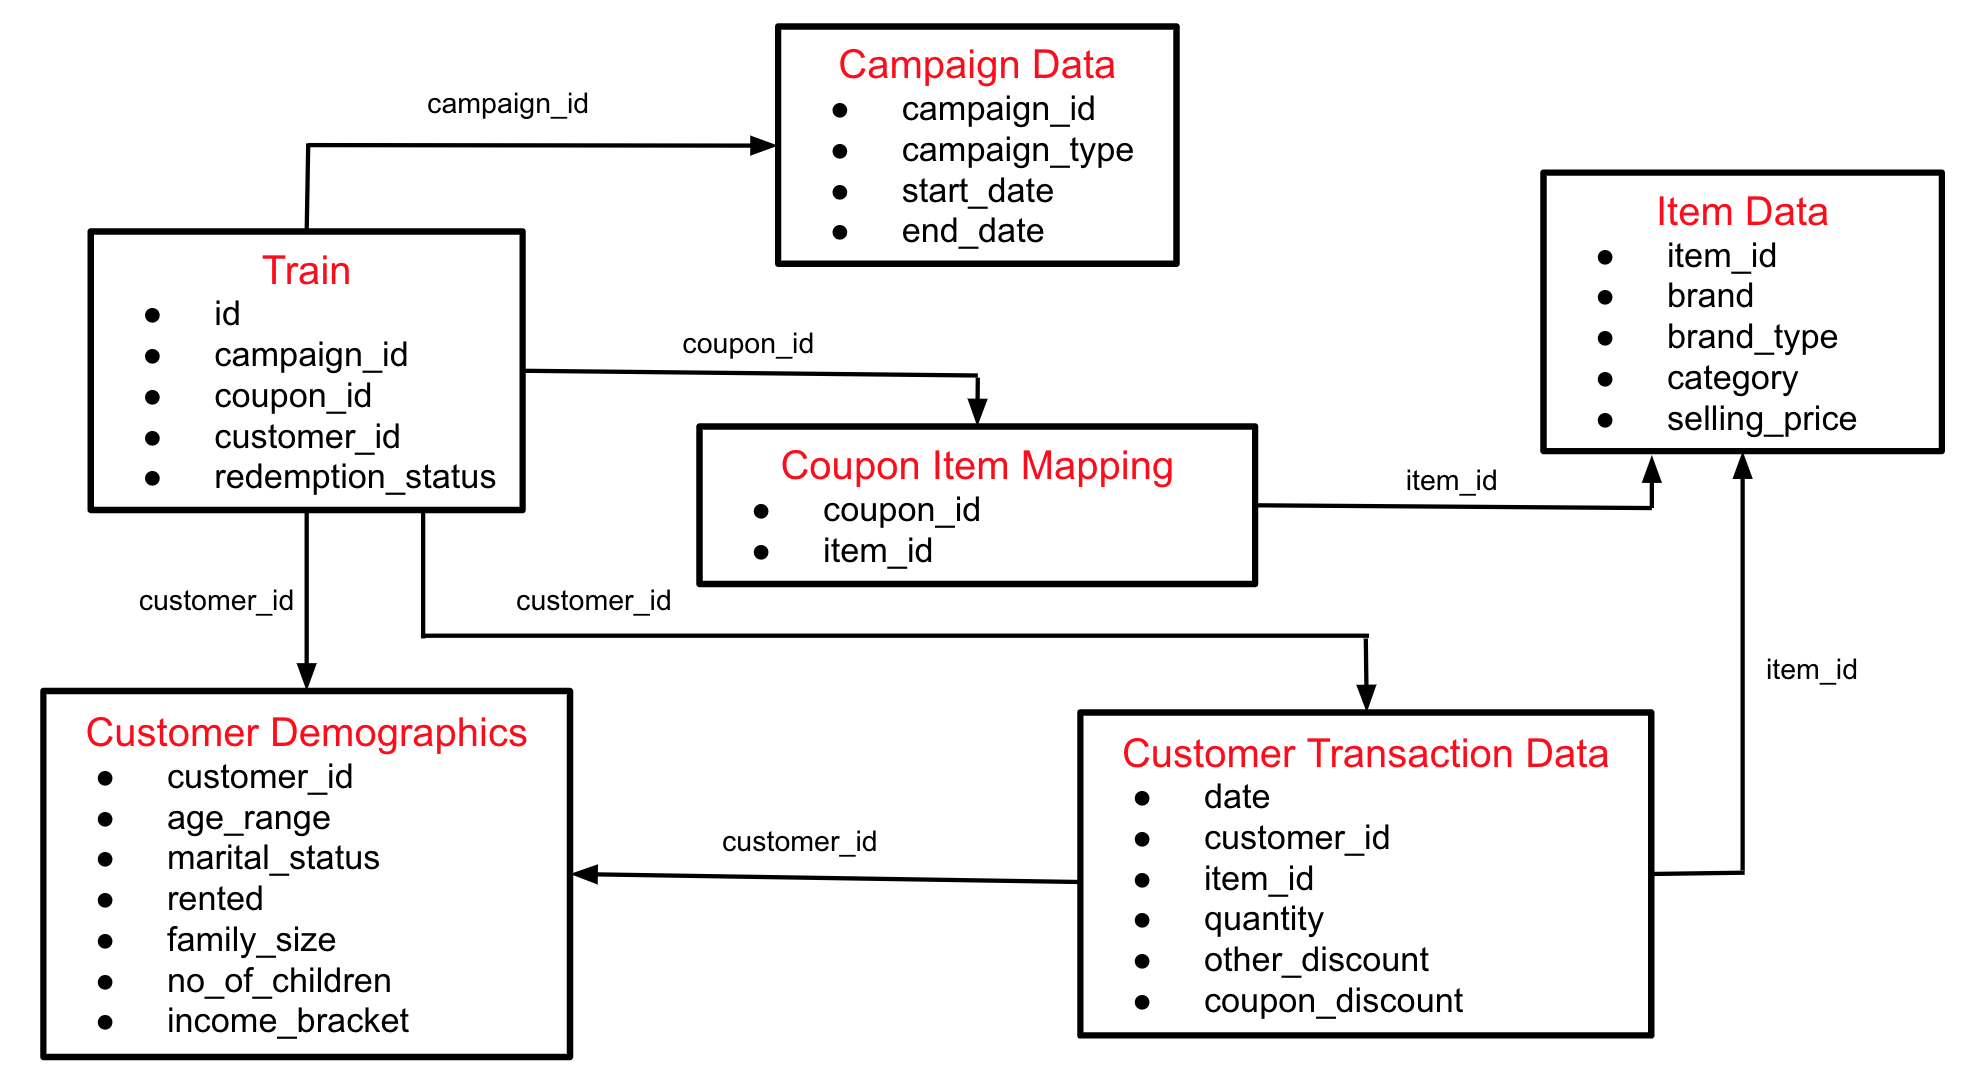

In [6]:
# Reading train.csv file :
train= pd.read_csv("/Users/shilpyjain/Downloads/train_AUpWtIz/train.csv")

In [7]:
#Reading all other five files :
campaign_data = pd.read_csv("/Users/shilpyjain/Downloads/train_AUpWtIz/campaign_data.csv")
coupon_item_mapping =  pd.read_csv("/Users/shilpyjain/Downloads/train_AUpWtIz/coupon_item_mapping.csv")
customer_demographics = pd.read_csv("/Users/shilpyjain/Downloads/train_AUpWtIz/customer_demographics.csv")
customer_transaction_data = pd.read_csv("/Users/shilpyjain/Downloads/train_AUpWtIz/customer_transaction_data.csv")
item_data = pd.read_csv("/Users/shilpyjain/Downloads/train_AUpWtIz/item_data.csv")

# ----------  EDA : train.csv -----------------

In [9]:
train.shape

(78369, 5)

In [5]:
train.columns

Index(['id', 'campaign_id', 'coupon_id', 'customer_id', 'redemption_status'], dtype='object')

In [10]:
train.head(5)

,id,campaign_id,coupon_id,customer_id,redemption_status
0,1,13,27,1053,0
1,2,13,116,48,0
2,6,9,635,205,0
3,7,13,644,1050,0
4,9,8,1017,1489,0


In [11]:
# Define Utiliy Functions
def data_insights_report(data=pd.DataFrame()):
    report = pd.DataFrame()
    report['Columns'] = data.columns
    report['Data_Types'] = data.dtypes.values
    report['Unique_Count'] = data.nunique().values
    report['NAN_Count'] = data.isna().sum().values

    tempdf = data.describe().apply(lambda x: round(x,2), axis=1).T
    pd.merge(report,tempdf.reset_index().rename(columns={'index':'Columns'}), on='Columns')

    return report.join(tempdf, on='Columns')

In [12]:
data_insights_report(train)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,id,int64,78369,0,78369.0,64347.98,37126.44,1.0,32260.0,64318.0,96577.0,128595.0
1,campaign_id,int64,18,0,78369.0,13.97,8.02,1.0,8.0,13.0,13.0,30.0
2,coupon_id,int64,866,0,78369.0,566.36,329.97,1.0,280.0,597.0,857.0,1115.0
3,customer_id,int64,1428,0,78369.0,787.45,456.81,1.0,399.0,781.0,1190.0,1582.0
4,redemption_status,int64,2,0,78369.0,0.01,0.10,0.0,0.0,0.0,0.0,1.0


In [13]:
train.redemption_status.value_counts(normalize=True)*100

0    99.069785
1     0.930215
Name: redemption_status, dtype: float64

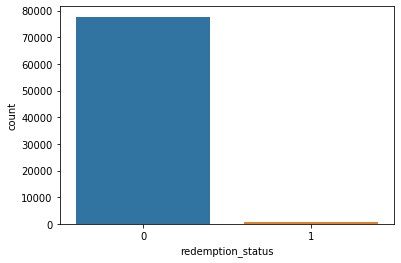

In [14]:
sns.countplot(train.redemption_status)

In [15]:
# Computing the %age of claim-0 and claim-1 in the Dataset
Out1=len(train[train.redemption_status==1])
Out0=len(train[train.redemption_status==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0
print("% of claim(1):",PC_of_1)
print("% of claim(0):",PC_of_0)

% of claim(1): 0.930214753282548
% of claim(0): 99.06978524671746


In [16]:
train['campaign_id'].unique()

array([13,  9,  8, 11, 29, 30,  2,  5, 12, 26,  3,  4, 10,  7, 28, 27,  6,
        1])

In [17]:
camp_coup_count=train.groupby("campaign_id")["coupon_id"].count()

In [18]:
camp_coup_count.head(10)

campaign_id
1       143
2       768
3       408
4       972
5      1827
6        65
7      1584
8     22555
9      3168
10     1723
Name: coupon_id, dtype: int64

In [19]:
camp_coup_count.tail(8)

campaign_id
11     2782
12     2550
13    22606
26     6056
27      324
28      476
29     3895
30     6467
Name: coupon_id, dtype: int64

In [20]:
camp_coup_count.max()

22606

Text(0, 0.5, 'coupon ID')

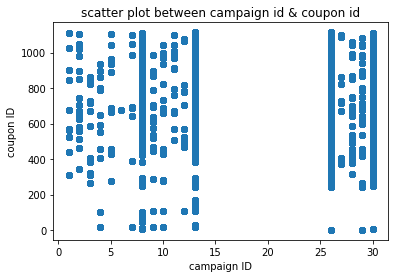

In [21]:
# creating scatter plot of camapign id & coupon id using seaborn
plt.subplot(1,1,1)
plt.scatter(x=train.campaign_id,y=train.coupon_id)
plt.title("scatter plot between campaign id & coupon id")
plt.xlabel("campaign ID")
plt.ylabel("coupon ID")

In [22]:
 cust_coup=train.groupby(["customer_id",'coupon_id'])["coupon_id"].count()

In [23]:
cust_coup.tail(5)

customer_id  coupon_id
1582         1025         1
             1043         1
             1047         1
             1070         1
             1081         1
Name: coupon_id, dtype: int64

In [24]:
cust_coup.head(5)

customer_id  coupon_id
1            3            1
             24           1
             52           1
             63           1
             75           1
Name: coupon_id, dtype: int64

In [25]:
cust_coup_count=train.groupby("customer_id")["coupon_id"].count()

In [26]:
cust_coup_count.head(5)

customer_id
1    94
3    42
4    23
5    52
6    32
Name: coupon_id, dtype: int64

# Inference :
1:As you can see, only about 0.9% of the observations in redemption_status are balanced. 
Therefore, if we are to always predict 0, we will achieve an accuracy of 99%.
There is huge imbalnce between 0 & 1
2: total customer is are 1428 

# ----------EDA : Campaign Data---------

In [27]:
data_insights_report(campaign_data)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,campaign_id,int64,28,0,28.0,15.57,9.12,1.0,7.75,16.5,23.25,30.0
1,campaign_type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,start_date,object,25,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,end_date,object,26,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
campaign_data.head(5)

,campaign_id,campaign_type,start_date,end_date
0,24,Y,21/10/13,20/12/13
1,25,Y,21/10/13,22/11/13
2,20,Y,07/09/13,16/11/13
3,23,Y,08/10/13,15/11/13
4,21,Y,16/09/13,18/10/13


In [29]:
campaign_data.shape

(28, 4)

In [30]:
campaign_data['start_date'].sort_index()

0     21/10/13
1     21/10/13
2     07/09/13
3     08/10/13
4     16/09/13
5     16/09/13
6     10/08/13
7     26/08/13
8     29/07/13
9     15/07/13
10    19/05/13
11    22/04/13
12    22/04/13
13    08/04/13
14    11/03/13
15    16/02/13
16    02/02/13
17    28/01/13
18    22/12/12
19    12/01/13
20    07/01/13
21    12/12/12
22    17/12/12
23    19/11/12
24    08/10/12
25    16/09/12
26    25/08/12
27    12/08/12
Name: start_date, dtype: object

In [31]:
campaign_data['end_date'].sort_index()

0     20/12/13
1     22/11/13
2     16/11/13
3     15/11/13
4     18/10/13
5     18/10/13
6     04/10/13
7     27/09/13
8     30/08/13
9     16/08/13
10    05/07/13
11    07/06/13
12    24/05/13
13    10/05/13
14    12/04/13
15    05/04/13
16    08/03/13
17    01/03/13
18    16/02/13
19    15/02/13
20    08/02/13
21    18/01/13
22    18/01/13
23    04/01/13
24    30/11/12
25    16/11/12
26    27/10/12
27    21/09/12
Name: end_date, dtype: object

In [32]:
campaign_data['campaign_type'].value_counts()

Y    22
X     6
Name: campaign_type, dtype: int64

In [33]:
campaign_data['campaign_type'].value_counts(normalize=True)*100

Y    78.571429
X    21.428571
Name: campaign_type, dtype: float64

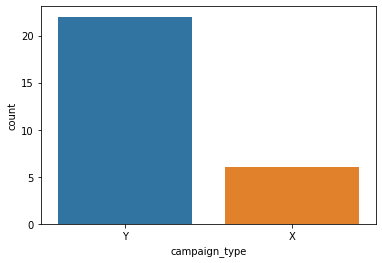

In [34]:
sns.countplot(campaign_data['campaign_type'])

# Inference :
Most of the campaigns are of type 'Y'.
There is 78 % and 21% distribution in campaign type Y & X respectively

# ------ EDA : ITEM_DATA.csv-------------

In [35]:
item_data.shape

(74066, 4)

In [36]:
data_insights_report(item_data)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,item_id,int64,74066,0,74066.0,37033.50,21381.16,1.0,18517.25,37033.5,55549.75,74066.0
1,brand,int64,5528,0,74066.0,1485.56,1537.39,1.0,278.00,978.0,2013.00,5528.0
2,brand_type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,category,object,19,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
(item_data['brand_type'].value_counts()/item_data['brand_type'].shape)*100

Established    84.845948
Local          15.154052
Name: brand_type, dtype: float64

In [38]:
item_data['brand_type'].value_counts()

Established    62842
Local          11224
Name: brand_type, dtype: int64

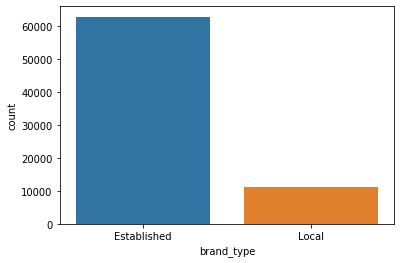

In [39]:
sns.countplot(item_data['brand_type'])

In [40]:
item_data['brand'].groupby(item_data['brand_type']).nunique()

brand_type
Established    5509
Local            19
Name: brand, dtype: int64

Text(0, 0.5, ' number of brand')

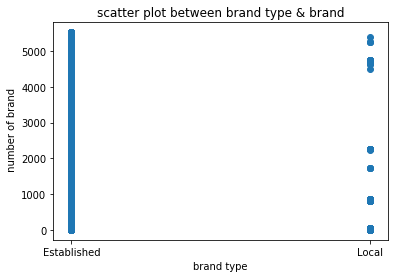

In [41]:
plt.scatter(x=item_data.brand_type,y=item_data.brand)
plt.title("scatter plot between brand type & brand")
plt.xlabel("brand type")
plt.ylabel(" number of brand")

In [42]:
(item_data['category'].value_counts()/item_data['category'].shape)*100

Grocery                   43.809575
Pharmaceutical            33.039451
Natural Products           3.419923
Dairy, Juices & Snacks     3.274107
Skin & Hair Care           3.029730
Meat                       2.808306
Packaged Meat              2.654389
Prepared Food              2.538277
Bakery                     2.266897
Seafood                    0.982907
Flowers & Plants           0.896498
Miscellaneous              0.519807
Alcohol                    0.409095
Garden                     0.137715
Restauarant                0.105311
Salads                     0.054006
Travel                     0.025653
Fuel                       0.018902
Vegetables (cut)           0.009451
Name: category, dtype: float64

In [43]:
(item_data['category'].groupby(item_data['brand_type']).value_counts(normalize=True))*100

brand_type   category              
Established  Grocery                   40.141943
             Pharmaceutical            35.775437
             Natural Products           3.731581
             Dairy, Juices & Snacks     3.632921
             Skin & Hair Care           3.406957
             Meat                       3.238280
             Packaged Meat              2.595398
             Prepared Food              2.436269
             Bakery                     1.696318
             Flowers & Plants           1.037523
             Seafood                    0.875211
             Miscellaneous              0.561726
             Alcohol                    0.482162
             Garden                     0.160721
             Restauarant                0.124121
             Salads                     0.062060
             Travel                     0.030235
             Vegetables (cut)           0.011139
Local        Grocery                   64.344262
             Pharmaceutical      

# Inference :
1.Two brand Types are there : Established & local . thier distribution ration is 84% and 16% respectively.
2.In established, there are total 5506 unique brands associated.
3:In Local, there are 19 unique brands associated.
4: In category, grocery & pharmaceutical has major part as 43% & 33%  respectively
5: In established , there are 40% & 35% are grocery & pharma respectively
6:In local ,there are 64% & 17% are grocery & pharma respectively

# --------EDA ON  Customer Demographics.csv ----------

In [44]:
data_insights_report(customer_demographics)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,customer_id,int64,760,0,760.0,779.20,459.75,1.0,382.75,774.5,1187.25,1581.0
1,age_range,object,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,marital_status,object,2,329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,rented,int64,2,0,760.0,0.05,0.23,0.0,0.00,0.0,0.00,1.0
4,family_size,object,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,no_of_children,object,3,538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,income_bracket,int64,12,0,760.0,4.72,2.26,1.0,3.00,5.0,6.00,12.0


In [45]:
customer_demographics['marital_status'].value_counts(normalize=True,dropna=False)*100

NaN        43.289474
Married    41.710526
Single     15.000000
Name: marital_status, dtype: float64

In [46]:
(customer_demographics['marital_status'].groupby(customer_demographics['no_of_children']).value_counts(dropna=False)/customer_demographics['customer_id'].shape)*100

no_of_children  marital_status
1               Married           8.289474
                NaN               4.473684
                Single            1.315789
2               Married           4.078947
                NaN               2.105263
                Single            1.052632
3+              Married           6.315789
                NaN               0.921053
                Single            0.657895
Name: marital_status, dtype: float64

In [47]:
customer_demographics['no_of_children'].unique()

array([nan, '1', '2', '3+'], dtype=object)

In [48]:
#percentage of null values
temp_df = customer_demographics.isnull().sum().reset_index()
temp_df['Percentage'] = (temp_df[0]/len(customer_demographics))*100
temp_df.columns = ['Column Name', 'Number of null values', 'Null values in percentage']
print(f"The length of dataset is \t {len(customer_demographics)}")
temp_df

The length of dataset is 	 760


,Column Name,Number of null values,Null values in percentage
0,customer_id,0,0.000000
1,age_range,0,0.000000
2,marital_status,329,43.289474
3,rented,0,0.000000
4,family_size,0,0.000000
5,no_of_children,538,70.789474
6,income_bracket,0,0.000000


In [49]:
customer_demographics['rented'].unique()

array([0, 1])

In [50]:
customer_demographics['rented'].value_counts(normalize=True)*100

0    94.605263
1     5.394737
Name: rented, dtype: float64

In [51]:
customer_demographics['age_range'].value_counts(normalize=True)*100

46-55    35.657895
36-45    24.605263
26-35    17.105263
70+       8.947368
56-70     7.763158
18-25     5.921053
Name: age_range, dtype: float64

# Inference:
1:There is an ambiguity in column " No of Children" those person whose marital status is single , still
have number of children specified
2:There is 70 % null values in No of children column
3: 35% customers are in age range of 46-55
4:94% customers have their own houses 
5.41% customers marital status is married
6.Total number of customer id are 760

# ---------- EDA on Customer_Transaction_data.csv --------

In [52]:
data_insights_report(customer_transaction_data)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,date,object,549,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,customer_id,int64,1582,0,1324566.0,804.00,457.34,1.00,418.00,801.00,1198.00,1582.00
2,item_id,int64,74063,0,1324566.0,29519.03,17908.06,1.00,14684.00,26597.00,42405.75,74066.00
3,quantity,int64,9252,0,1324566.0,130.66,1311.55,1.00,1.00,1.00,1.00,89638.00
4,selling_price,float64,4923,0,1324566.0,114.60,152.91,0.36,49.16,78.01,124.31,17809.64
5,other_discount,float64,1418,0,1324566.0,-17.77,37.89,-3120.31,-23.15,-1.78,0.00,0.00
6,coupon_discount,float64,232,0,1324566.0,-0.59,7.07,-1992.23,0.00,0.00,0.00,0.00


In [53]:
customer_transaction_data.shape

(1324566, 7)

In [54]:
customer_transaction_data['other_discount'].head(5)

0   -10.69
1   -13.89
2   -14.25
3     0.00
4   -28.14
Name: other_discount, dtype: float64

In [55]:
customer_transaction_data['other_discount'].min()

-3120.31

In [56]:
customer_transaction_data['coupon_discount'].min()

-1992.23

In [57]:
customer_transaction_data['selling_price'].max()

17809.64

In [58]:
customer_transaction_data[customer_transaction_data['selling_price']==customer_transaction_data['selling_price'].max()]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
792371,2012-12-21,240,69910,1,17809.64,-1781.0,0.0


In [59]:
customer_transaction_data[customer_transaction_data['coupon_discount']==customer_transaction_data['coupon_discount'].min()]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
658929,2012-11-04,781,61002,8,2048.86,-227.97,-1992.23


In [60]:
customer_transaction_data[customer_transaction_data['other_discount']==customer_transaction_data['other_discount'].min()]

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
955104,2013-02-17,69,45578,40,3562.0,-3120.31,0.0


In [ ]:
#Inference:
1: total unique customer_id are 1582 so we dont have  customer details of 822 customers

# ----------EDA - Coupon_item_mapping .csv----------

In [61]:
data_insights_report(coupon_item_mapping)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,coupon_id,int64,1116,0,92663.0,155.97,282.99,1.0,22.0,30.0,42.0,1116.0
1,item_id,int64,36289,0,92663.0,36508.61,21131.31,1.0,18255.5,37955.0,54191.5,74061.0


In [62]:
coupon_item_mapping.shape

(92663, 2)

In [63]:
coupon_item_mapping.head(5)

,coupon_id,item_id
0,105,37
1,107,75
2,494,76
3,522,77
4,518,77


# ----------------------------- DATA PREPROCESSING -------------------

## Campaign_ data:


In [64]:
campaign_data['start_date'] = pd.to_datetime(campaign_data['start_date'])
campaign_data['end_date'] = pd.to_datetime(campaign_data['end_date'])

In [65]:
campaign_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 4 columns):
campaign_id      28 non-null int64
campaign_type    28 non-null object
start_date       28 non-null datetime64[ns]
end_date         28 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1)
memory usage: 976.0+ bytes


In [66]:
# Adding new column :
campaign_data['campaign_run'] = abs((campaign_data['end_date'] -  campaign_data['start_date']).dt.days)

In [67]:
#longest running campaign:
campaign_data[campaign_data['campaign_run']==campaign_data['campaign_run'].max()]

,campaign_id,campaign_type,start_date,end_date,campaign_run
19,5,Y,2013-12-01,2013-02-15,289


# Step 4: create a master data set (merging all five files in train dataset)

## Step 4.1 creating dataframe with train & campaign_data 

In [68]:
#Join the train and campaign_data
train_df = pd.merge(train, campaign_data, on='campaign_id', how='left')

In [69]:
train_df.head(5)

,id,campaign_id,coupon_id,customer_id,redemption_status,campaign_type,start_date,end_date,campaign_run
0,1,13,27,1053,0,X,2013-05-19,2013-05-07,12
1,2,13,116,48,0,X,2013-05-19,2013-05-07,12
2,6,9,635,205,0,Y,2013-11-03,2013-12-04,31
3,7,13,644,1050,0,X,2013-05-19,2013-05-07,12
4,9,8,1017,1489,0,X,2013-02-16,2013-05-04,77


In [70]:
train_df.shape

(78369, 9)

In [71]:
data_insights_report(train_df)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,id,int64,78369,0,78369.0,64347.98,37126.44,1.0,32260.0,64318.0,96577.0,128595.0
1,campaign_id,int64,18,0,78369.0,13.97,8.02,1.0,8.0,13.0,13.0,30.0
2,coupon_id,int64,866,0,78369.0,566.36,329.97,1.0,280.0,597.0,857.0,1115.0
3,customer_id,int64,1428,0,78369.0,787.45,456.81,1.0,399.0,781.0,1190.0,1582.0
4,redemption_status,int64,2,0,78369.0,0.01,0.10,0.0,0.0,0.0,0.0,1.0
5,campaign_type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,start_date,datetime64[ns],17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,end_date,datetime64[ns],17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,campaign_run,int64,16,0,78369.0,66.65,53.97,12.0,12.0,77.0,78.0,289.0


## Step 4.2 merging item_data & coupon_item_mapping

In [72]:
# Join coupon_item_mapping & item_data and craeting a new dataframe df1:
df1 = pd.merge(coupon_item_mapping,item_data,on='item_id',how='left')


In [73]:
df1.shape

(92663, 5)

In [74]:
data_insights_report(df1)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,coupon_id,int64,1116,0,92663.0,155.97,282.99,1.0,22.0,30.0,42.0,1116.0
1,item_id,int64,36289,0,92663.0,36508.61,21131.31,1.0,18255.5,37955.0,54191.5,74061.0
2,brand,int64,2555,0,92663.0,1473.57,1539.65,1.0,213.0,967.0,2035.0,5472.0
3,brand_type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,category,object,17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
df1.groupby('coupon_id').count().reset_index()[['coupon_id','item_id']].head()

,coupon_id,item_id
0,1,39
1,2,2
2,3,17
3,4,24
4,5,7


## Step 4.3 Creating a new DataFrame using df1 and adding columns accordingly:

In [76]:
df1_new=pd.DataFrame()

In [77]:
df1_new[['coupon_id','category_count']] = \
df1.groupby('coupon_id').count().reset_index()[['coupon_id','item_id']]

In [78]:
df1_new.head(5)

,coupon_id,category_count
0,1,39
1,2,2
2,3,17
3,4,24
4,5,7


In [79]:
df1.groupby('coupon_id').max().reset_index().head()

,coupon_id,item_id,brand,brand_type,category
0,1,67376,4700,Established,Natural Products
1,2,12901,2084,Established,Grocery
2,3,59346,1558,Established,Grocery
3,4,61353,544,Established,Grocery
4,5,57118,5357,Established,Pharmaceutical


In [80]:
df1_new[['brand_type','category']] = \
df1.groupby('coupon_id').max().reset_index()[['brand_type','category']]

In [81]:
df1_new.head(5)

,coupon_id,category_count,brand_type,category
0,1,39,Established,Natural Products
1,2,2,Established,Grocery
2,3,17,Established,Grocery
3,4,24,Established,Grocery
4,5,7,Established,Pharmaceutical


## step 4.4 reseting index on  Customer_transaction_data:

In [285]:
customer_transaction_data.columns

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount'],
      dtype='object')

In [272]:
customer_transaction_data.head(5)

,date,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,2012-01-02,1501,26830,1,35.26,-10.69,0.0
1,2012-01-02,1501,54253,1,53.43,-13.89,0.0
2,2012-01-02,1501,31962,1,106.50,-14.25,0.0
3,2012-01-02,1501,33647,1,67.32,0.00,0.0
4,2012-01-02,1501,48199,1,71.24,-28.14,0.0


In [232]:
df2=customer_transaction_data.groupby(['customer_id']).sum().reset_index()

In [233]:
df2.head()

,customer_id,item_id,quantity,selling_price,other_discount,coupon_discount
0,1,31712801,1227,98513.93,-17030.40,-2116.83
1,2,12698104,474,43100.03,-7051.95,-249.34
2,3,20205585,8163,73050.27,-16013.53,-2179.54
3,4,6180732,280,33973.22,-2927.19,-89.05
4,5,26024517,93353,103615.10,-10817.07,-90.83


In [234]:
# droping item_id column:
df2.drop('item_id',axis=1,inplace=True)

In [291]:
df2.shape

(1582, 5)

In [293]:
df2.head(5)

,customer_id,quantity,selling_price,other_discount,coupon_discount
0,1,8138,705878.84,-49069.73,-2606.64
1,2,1254,113485.65,-8826.73,-249.34
2,3,9606,167874.50,-26774.16,-2161.73
3,4,800,102124.15,-5606.50,-89.05
4,5,98476,457553.41,-19660.39,-90.83


## date column has disappeared after groupby :


In [307]:
customer_transaction_data=pd.read_csv("/Users/shilpyjain/Downloads/train_AUpWtIz/customer_transaction_data.csv")

In [82]:
customer_transaction_data.columns

Index(['date', 'customer_id', 'item_id', 'quantity', 'selling_price',
       'other_discount', 'coupon_discount'],
      dtype='object')

In [83]:
customer_transaction_data['date'] = customer_transaction_data['date'].astype('datetime64[ns]')

In [84]:
#extracting month, year & date from date column & dropping date column

customer_transaction_data['C_date_year'] = customer_transaction_data['date'].dt.year
customer_transaction_data['C_date_month'] = customer_transaction_data['date'].dt.month
customer_transaction_data['C_date_day'] = customer_transaction_data['date'].dt.day
customer_transaction_data = customer_transaction_data.drop('date',axis=1)

In [85]:
customer_transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324566 entries, 0 to 1324565
Data columns (total 9 columns):
customer_id        1324566 non-null int64
item_id            1324566 non-null int64
quantity           1324566 non-null int64
selling_price      1324566 non-null float64
other_discount     1324566 non-null float64
coupon_discount    1324566 non-null float64
C_date_year        1324566 non-null int64
C_date_month       1324566 non-null int64
C_date_day         1324566 non-null int64
dtypes: float64(3), int64(6)
memory usage: 91.0 MB


In [86]:
df_cust_1=customer_transaction_data.groupby(['customer_id']).sum().reset_index()

In [87]:
df_cust_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582 entries, 0 to 1581
Data columns (total 9 columns):
customer_id        1582 non-null int64
item_id            1582 non-null int64
quantity           1582 non-null int64
selling_price      1582 non-null float64
other_discount     1582 non-null float64
coupon_discount    1582 non-null float64
C_date_year        1582 non-null int64
C_date_month       1582 non-null int64
C_date_day         1582 non-null int64
dtypes: float64(3), int64(6)
memory usage: 111.3 KB


In [88]:
df_cust_1.shape

(1582, 9)

In [89]:
# droping item_id column:
df_cust_1.drop('item_id',axis=1,inplace=True)

In [90]:
df_cust_1.head(5)

,customer_id,quantity,selling_price,other_discount,coupon_discount,C_date_year,C_date_month,C_date_day
0,1,1227,98513.93,-17030.40,-2116.83,2108951,6565,15434
1,2,474,43100.03,-7051.95,-249.34,843164,2792,6410
2,3,8163,73050.27,-16013.53,-2179.54,1418626,4787,11048
3,4,280,33973.22,-2927.19,-89.05,442658,1587,3392
4,5,93353,103615.10,-10817.07,-90.83,1593744,5379,12929


## step 4.5 Merging customer_transaction_data & customer_demographics together into third dataframe df3:

In [91]:
df3=pd.merge(df_cust_1,customer_demographics,on='customer_id',how='outer')

In [92]:
df3.head(5)

,customer_id,quantity,selling_price,other_discount,coupon_discount,C_date_year,C_date_month,C_date_day,age_range,marital_status,rented,family_size,no_of_children,income_bracket
0,1,1227,98513.93,-17030.40,-2116.83,2108951,6565,15434,70+,Married,0.0,2,NaN,4.0
1,2,474,43100.03,-7051.95,-249.34,843164,2792,6410,NaN,NaN,NaN,NaN,NaN,NaN
2,3,8163,73050.27,-16013.53,-2179.54,1418626,4787,11048,NaN,NaN,NaN,NaN,NaN,NaN
3,4,280,33973.22,-2927.19,-89.05,442658,1587,3392,NaN,NaN,NaN,NaN,NaN,NaN
4,5,93353,103615.10,-10817.07,-90.83,1593744,5379,12929,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df3.shape

(1582, 14)

In [94]:
data_insights_report(df3)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,customer_id,int64,1582,0,1582.0,791.50,456.83,1.00,396.25,791.50,1186.75,1582.00
1,quantity,int64,1481,0,1582.0,109400.90,205026.63,88.00,924.75,18768.50,129491.00,2617544.00
2,selling_price,float64,1582,0,1582.0,95954.54,75260.50,7806.08,45327.19,72597.88,124123.05,583638.78
3,other_discount,float64,1582,0,1582.0,-14877.26,11664.14,-101428.31,-19266.62,-11628.92,-6910.24,-549.25
4,coupon_discount,float64,801,0,1582.0,-498.09,1059.41,-11937.80,-469.82,-145.86,-26.71,0.00
5,C_date_year,int64,1577,0,1582.0,1684910.81,1216536.05,159007.00,837042.75,1336337.50,2170375.00,9099530.00
6,C_date_month,int64,1469,0,1582.0,5057.61,3740.08,238.00,2469.75,4023.50,6523.75,27930.00
7,C_date_day,int64,1512,0,1582.0,13235.53,9608.30,1028.00,6482.25,10468.00,17106.75,70237.00
8,age_range,object,6,822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,marital_status,object,2,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Step 4.6: merging train_df & df3 into master_data

In [95]:
master_data = pd.merge(train_df,df3,on=['customer_id'],how='left')

In [96]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 22 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null datetime64[ns]
end_date             78369 non-null datetime64[ns]
campaign_run         78369 non-null int64
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
C_date_year          78369 non-null int64
C_date_month         78369 non-null int64
C_date_day           78369 non-null int64
age_range            43661 non-null object
marital_status       25394 non-null object
rented               43661 non-null float64
family_size          43661 non-null object
no_of_children       

In [97]:
data_insights_report(master_data)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,id,int64,78369,0,78369.0,64347.98,37126.44,1.00,32260.00,64318.00,96577.00,128595.00
1,campaign_id,int64,18,0,78369.0,13.97,8.02,1.00,8.00,13.00,13.00,30.00
2,coupon_id,int64,866,0,78369.0,566.36,329.97,1.00,280.00,597.00,857.00,1115.00
3,customer_id,int64,1428,0,78369.0,787.45,456.81,1.00,399.00,781.00,1190.00,1582.00
4,redemption_status,int64,2,0,78369.0,0.01,0.10,0.00,0.00,0.00,0.00,1.00
5,campaign_type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,start_date,datetime64[ns],17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,end_date,datetime64[ns],17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,campaign_run,int64,16,0,78369.0,66.65,53.97,12.00,12.00,77.00,78.00,289.00
9,quantity,int64,1348,0,78369.0,141279.44,241447.03,88.00,1593.00,31641.00,184709.00,2617544.00


## Step 4.7: merging master_data & df1_new ( item_data & coupon_item_mapping):
        

In [98]:
master_data=pd.merge(master_data,df1_new,on=['coupon_id'],how='left')

In [99]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 25 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
start_date           78369 non-null datetime64[ns]
end_date             78369 non-null datetime64[ns]
campaign_run         78369 non-null int64
quantity             78369 non-null int64
selling_price        78369 non-null float64
other_discount       78369 non-null float64
coupon_discount      78369 non-null float64
C_date_year          78369 non-null int64
C_date_month         78369 non-null int64
C_date_day           78369 non-null int64
age_range            43661 non-null object
marital_status       25394 non-null object
rented               43661 non-null float64
family_size          43661 non-null object
no_of_children       

In [100]:
data_insights_report(master_data)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,id,int64,78369,0,78369.0,64347.98,37126.44,1.00,32260.00,64318.00,96577.00,128595.00
1,campaign_id,int64,18,0,78369.0,13.97,8.02,1.00,8.00,13.00,13.00,30.00
2,coupon_id,int64,866,0,78369.0,566.36,329.97,1.00,280.00,597.00,857.00,1115.00
3,customer_id,int64,1428,0,78369.0,787.45,456.81,1.00,399.00,781.00,1190.00,1582.00
4,redemption_status,int64,2,0,78369.0,0.01,0.10,0.00,0.00,0.00,0.00,1.00
5,campaign_type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,start_date,datetime64[ns],17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,end_date,datetime64[ns],17,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,campaign_run,int64,16,0,78369.0,66.65,53.97,12.00,12.00,77.00,78.00,289.00
9,quantity,int64,1348,0,78369.0,141279.44,241447.03,88.00,1593.00,31641.00,184709.00,2617544.00


In [328]:
master_data.shape

(78369, 25)

# Treating Null Values :


### Null values in age_range:


In [101]:
master_data['age_range'].fillna(master_data['age_range'].mode()[0],inplace=True)

### Null values in Rented column :

In [102]:
master_data['rented'].fillna(master_data['rented'].mode()[0],inplace=True)

### Null values in marital status column:

In [103]:
master_data['marital_status']=master_data['marital_status'].fillna("Unspecified")

In [104]:
master_data['marital_status'].unique()

array(['Unspecified', 'Married', 'Single'], dtype=object)

### Null values in Family size:

In [105]:
master_data['family_size'].unique()

array(['1', '2', nan, '3', '4', '5+'], dtype=object)

In [106]:
master_data['family_size'].fillna(master_data['family_size'].mode()[0],inplace=True)

### Null values in Income Bracket :

In [107]:
master_data['income_bracket'].fillna(master_data['income_bracket'].median(),inplace=True)

# Label Encoding :

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
lc = LabelEncoder()

In [110]:
master_data['age_range'] = lc.fit_transform(master_data['age_range'])
master_data['family_size'] = lc.fit_transform(master_data['family_size'])

# Feature Engineering :

### mapping category column into two categories : edible & non edible

In [111]:
master_data.category.unique()

array(['Grocery', 'Pharmaceutical', 'Packaged Meat', 'Miscellaneous',
       'Seafood', 'Prepared Food', 'Bakery', 'Natural Products',
       'Vegetables (cut)', 'Dairy, Juices & Snacks', 'Skin & Hair Care',
       'Flowers & Plants', 'Meat', 'Restauarant'], dtype=object)

In [112]:
cat_list=['Bakery', 'Packaged Meat', 'Seafood', 'Dairy, Juices & Snacks',
            'Prepared Food','Meat','Salads', 'Alcohol','Vegetables (cut)']

In [113]:
def category_map(x):
    if x in cat_list:
        return 'edible'
    else:
        return 'non-edible'

In [114]:
master_data['category'] = master_data['category'].apply(category_map)

In [115]:
master_data['category'].unique()

array(['non-edible', 'edible'], dtype=object)

### Creating a final_price column based upon selling_price, coupon_discount & other_discount

In [116]:
master_data['final_price'] = master_data['selling_price']+ master_data['other_discount'] + master_data['coupon_discount']

### Changing start_date & end_date columns into day, month & year :

In [117]:
master_data['start_date_year'] = master_data['start_date'].dt.year
master_data['start_date_month'] = master_data['start_date'].dt.month
master_data['start_date_day'] = master_data['start_date'].dt.day

In [118]:
master_data['end_date_year'] = master_data['end_date'].dt.year
master_data['end_date_month'] = master_data['end_date'].dt.month
master_data['end_date_day'] = master_data['end_date'].dt.day

# Dropping some columns:

### Dropping selling_price, other_discount & coupon_discount

In [119]:
master_data.drop(['selling_price','other_discount','coupon_discount'],axis=1,inplace=True)

In [120]:
master_data.drop(['start_date','end_date'],axis=1,inplace=True)

In [121]:
master_data.drop(['no_of_children'],axis=1,inplace=True) # as most of values are null

# Checking Dataframe:

In [357]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 26 columns):
id                   78369 non-null int64
campaign_id          78369 non-null int64
coupon_id            78369 non-null int64
customer_id          78369 non-null int64
redemption_status    78369 non-null int64
campaign_type        78369 non-null object
campaign_run         78369 non-null int64
quantity             78369 non-null int64
C_date_year          78369 non-null int64
C_date_month         78369 non-null int64
C_date_day           78369 non-null int64
age_range            78369 non-null int64
marital_status       78369 non-null object
rented               78369 non-null float64
family_size          78369 non-null int64
income_bracket       78369 non-null float64
category_count       78369 non-null int64
brand_type           78369 non-null object
category             78369 non-null object
final_price          78369 non-null float64
end_date_year        78369 non-null int64

In [122]:
data_insights_report(master_data)

,Columns,Data_Types,Unique_Count,NAN_Count,count,mean,std,min,25%,50%,75%,max
0,id,int64,78369,0,78369.0,64347.98,37126.44,1.00,32260.00,64318.00,96577.00,128595.0
1,campaign_id,int64,18,0,78369.0,13.97,8.02,1.00,8.00,13.00,13.00,30.0
2,coupon_id,int64,866,0,78369.0,566.36,329.97,1.00,280.00,597.00,857.00,1115.0
3,customer_id,int64,1428,0,78369.0,787.45,456.81,1.00,399.00,781.00,1190.00,1582.0
4,redemption_status,int64,2,0,78369.0,0.01,0.10,0.00,0.00,0.00,0.00,1.0
5,campaign_type,object,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,campaign_run,int64,16,0,78369.0,66.65,53.97,12.00,12.00,77.00,78.00,289.0
7,quantity,int64,1348,0,78369.0,141279.44,241447.03,88.00,1593.00,31641.00,184709.00,2617544.0
8,C_date_year,int64,1425,0,78369.0,2077838.92,1324278.94,167013.00,1120919.00,1778979.00,2686586.00,9099530.0
9,C_date_month,int64,1339,0,78369.0,6244.22,4009.27,339.00,3366.00,5414.00,8018.00,27930.0


# # checking null values in final dataframe

In [123]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [124]:
# Missing values statistics of Customers
missing_values = missing_values_table(master_data)
missing_values.head(10)

Your selected dataframe has 26 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Transforming Categorical column to Integer column : One Hot Encoding

In [125]:
train_df=pd.get_dummies(data=master_data,columns=['campaign_type','marital_status','brand_type','category'])

In [126]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 31 columns):
id                            78369 non-null int64
campaign_id                   78369 non-null int64
coupon_id                     78369 non-null int64
customer_id                   78369 non-null int64
redemption_status             78369 non-null int64
campaign_run                  78369 non-null int64
quantity                      78369 non-null int64
C_date_year                   78369 non-null int64
C_date_month                  78369 non-null int64
C_date_day                    78369 non-null int64
age_range                     78369 non-null int64
rented                        78369 non-null float64
family_size                   78369 non-null int64
income_bracket                78369 non-null float64
category_count                78369 non-null int64
final_price                   78369 non-null float64
start_date_year               78369 non-null int64
start_date_month  

# Dropping some unique id column & target variable from train dataframe

In [127]:
train_df2=train_df.drop(['redemption_status','coupon_id','customer_id','id','campaign_id'],axis=1)

In [128]:
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78369 entries, 0 to 78368
Data columns (total 26 columns):
campaign_run                  78369 non-null int64
quantity                      78369 non-null int64
C_date_year                   78369 non-null int64
C_date_month                  78369 non-null int64
C_date_day                    78369 non-null int64
age_range                     78369 non-null int64
rented                        78369 non-null float64
family_size                   78369 non-null int64
income_bracket                78369 non-null float64
category_count                78369 non-null int64
final_price                   78369 non-null float64
start_date_year               78369 non-null int64
start_date_month              78369 non-null int64
start_date_day                78369 non-null int64
end_date_year                 78369 non-null int64
end_date_month                78369 non-null int64
end_date_day                  78369 non-null int64
campaign_type_X   

# Robust Scaler:

In [129]:
rc = RobustScaler()

In [130]:
scaledData = pd.DataFrame(rc.fit_transform(train_df2),columns=train_df2.columns)
scaledData.head()

,campaign_run,quantity,C_date_year,C_date_month,C_date_day,age_range,rented,family_size,income_bracket,category_count,...,end_date_day,campaign_type_X,campaign_type_Y,marital_status_Married,marital_status_Single,marital_status_Unspecified,brand_type_Established,brand_type_Local,category_edible,category_non-edible
0,-0.984848,0.403624,-0.737767,-0.773646,-0.776890,0.0,0.0,-1.0,0.0,4.52,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.984848,-0.106479,-0.641387,-0.721410,-0.633475,-1.0,0.0,0.0,-2.0,-0.36,...,0.333333,0.0,0.0,1.0,0.0,-1.0,-1.0,1.0,0.0,0.0
2,-0.696970,-0.165414,0.110495,0.122098,0.258963,0.0,0.0,0.0,2.0,2.20,...,-0.666667,-1.0,1.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0
3,-0.984848,-0.171121,-0.831654,-0.788478,-0.889831,0.0,0.0,0.0,0.0,-0.32,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.586634,-0.413914,-0.250000,-0.481503,0.0,0.0,0.0,-2.0,0.80,...,-0.666667,0.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0


# Baseline Model :

In [131]:
X = scaledData
y = train_df['redemption_status']

In [132]:
# Split data in to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# logistic Regression

In [133]:
# Logistic Regression :
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(y_test, y_pred) * 100, 2)
prec_log= round(precision_score(y_test, y_pred) * 100, 2)
F1_log = round(f1_score(y_test,y_pred)*100,2)
Recall_log = round(recall_score(y_test,y_pred)*100,2)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [134]:
Recall_log

0.48

In [135]:
prec_log

100.0

In [136]:
#Feature Preference given by Logistic Regression
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
22,brand_type_Local,0.734883
11,start_date_month,0.663271
17,campaign_type_Y,0.660978
4,age_range,0.587028
24,category_non-edible,0.374646
12,start_date_day,0.349685
2,C_date_month,0.330856
1,C_date_year,0.257180
19,marital_status_Single,0.253893
14,end_date_month,0.181040


# KNN:

In [137]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_knn=round(precision_score(y_test, Y_pred) * 100, 2)
F1_knn = round(f1_score(y_test,Y_pred)*100,2)
Recall_knn = round(recall_score(y_test,Y_pred)*100,2)

In [138]:
prec_knn

24.53

# Gaussian Naive Baiyes

In [139]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_guassian=round(precision_score(y_test, Y_pred) * 100, 2)
F1_guassian = round(f1_score(y_test,Y_pred)*100,2)
Recall_guassian= round(recall_score(y_test,Y_pred)*100,2)

In [140]:
prec_guassian

2.75

# Decision Tree

In [141]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_decision_tree=round(precision_score(y_test, Y_pred) * 100, 2)
F1_decision_tree = round(f1_score(y_test,Y_pred)*100,2)
Recall_decision_tree = round(recall_score(y_test,Y_pred)*100,2)

In [142]:
prec_decision_tree

13.49

# Random Forest :

In [143]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_random_forest=round(precision_score(y_test, Y_pred) * 100, 2)
F1_random_forest = round(f1_score(y_test,Y_pred)*100,2)
Recall_random_forest = round(recall_score(y_test,Y_pred)*100,2)

In [144]:
prec_random_forest

22.81

In [145]:
conf_matrix=confusion_matrix(y_test, Y_pred)

In [146]:
conf_matrix

array([[23216,    88],
       [  181,    26]])

In [147]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     23304
           1       0.23      0.13      0.16       207

    accuracy                           0.99     23511
   macro avg       0.61      0.56      0.58     23511
weighted avg       0.99      0.99      0.99     23511



# KFOLD 

In [148]:
#kfold
from sklearn.model_selection import KFold,LeaveOneOut
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestClassifier(criterion='gini')

In [149]:
# KFOLD on Random Forest
scores = []
for i in range(12):
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.9883884139339033, 0.9865382161541406, 0.9869848156182213, 0.9870486155416613, 0.9881332142401429, 0.988197014163583, 0.9874314150823019, 0.9877504146995023, 0.9894092127089448, 0.9870486155416613, 0.9884522138573434, 0.9878780145463826]
Average K-Fold Score : 0.9877716813406491


In [150]:
accuracy_score(y_test,predictions)
acc_kfold_rf = round(accuracy_score(y_test,predictions) * 100, 2)
prec_kfold_rf=round(precision_score(y_test,predictions) * 100, 2)
F1_kfold_rf = round(f1_score(y_test,predictions)*100,2)
Recall_kfold_rf = round(recall_score(y_test,predictions)*100,2)

In [151]:
prec_kfold_rf

26.25

In [152]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
category_count,0.446
quantity,0.068
final_price,0.068
C_date_year,0.067
C_date_day,0.067
C_date_month,0.065
income_bracket,0.026
age_range,0.021
family_size,0.020


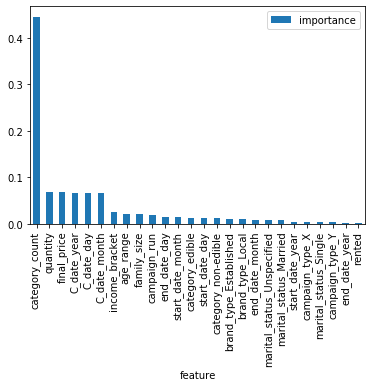

In [153]:
importances.plot.bar()

# Final values to csv 

In [154]:
models = pd.DataFrame({
    
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree','K_fold_RF'],
    'Acc_Score': [acc_knn, acc_log, 
              acc_random_forest, 
              acc_decision_tree,acc_kfold_rf],
    'Precision':[prec_knn, prec_log, 
              prec_random_forest,
              prec_decision_tree,prec_kfold_rf],
    'Recall':[Recall_knn, Recall_log, 
              Recall_random_forest, 
              Recall_decision_tree,Recall_kfold_rf],
    'F1':[F1_knn, F1_log, F1_random_forest,
            F1_decision_tree,F1_kfold_rf]})
models.sort_values(by='Precision', ascending=False)



,Model,Acc_Score,Precision,Recall,F1
1,Logistic Regression,99.12,100.00,0.48,0.96
4,K_fold_RF,98.79,26.25,13.82,18.10
0,KNN,99.00,24.53,6.28,10.00
2,Random Forest,98.86,22.81,12.56,16.20
3,Decision Tree,98.34,13.49,16.43,14.81


In [155]:
models.to_csv('Record_1+2.csv',index=False)

In [156]:
import csv

In [157]:
f = open('Record_1+2.csv','w')

In [160]:
writer = csv.DictWriter(f,fieldnames=['Using LE & OHE  (used aggregation functions)'])

In [161]:
writer.writeheader()

In [162]:
f.close()

In [163]:
models.to_csv('Record_1+2.csv',mode='a',index=False)

# Rescaling :

# --------------------- Upsampling SMOTE ---------------------------------

In [164]:
from imblearn.over_sampling import SMOTE

In [399]:
pip install imblearn

     |████████████████████████████████| 163kB 573kB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 710kB/s eta 0:00:01    |██▉                             | 952kB 1.0MB/s eta 0:00:10
  Found existing installation: scikit-learn 0.21.2
    Uninstalling scikit-learn-0.21.2:
      Successfully uninstalled scikit-learn-0.21.2
Note: you may need to restart the kernel to use updated packages.


In [165]:
sm = SMOTE()

In [166]:
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [167]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (124236, 26)
After OverSampling, the shape of train_y: (124236,) 

After OverSampling, counts of label '1': 62118
After OverSampling, counts of label '0': 62118


In [184]:
# Logistic Regression :
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(y_test, y_pred) * 100, 2)
prec_log= round(precision_score(y_test, y_pred) * 100, 2)
F1_log = round(f1_score(y_test,y_pred)*100,2)
Recall_log = round(recall_score(y_test,y_pred)*100,2)
# print classification report 
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       1.00      0.72      0.84     15548
           1       0.02      0.69      0.04       126

    accuracy                           0.72     15674
   macro avg       0.51      0.71      0.44     15674
weighted avg       0.99      0.72      0.83     15674



//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [169]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_res, y_train_res)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train_res, y_train_res)
acc_random_forest = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_random_forest=round(precision_score(y_test, Y_pred) * 100, 2)
F1_random_forest = round(f1_score(y_test,Y_pred)*100,2)
Recall_random_forest = round(recall_score(y_test,Y_pred)*100,2)

In [170]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15522
           1       0.22      0.20      0.21       152

    accuracy                           0.99     15674
   macro avg       0.61      0.60      0.60     15674
weighted avg       0.98      0.99      0.99     15674



In [171]:
## Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train_res, y_train_res)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_guassian=round(precision_score(y_test, Y_pred) * 100, 2)
F1_guassian = round(f1_score(y_test,Y_pred)*100,2)
Recall_guassian= round(recall_score(y_test,Y_pred)*100,2)

In [172]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.69      0.81     15522
           1       0.02      0.66      0.04       152

    accuracy                           0.69     15674
   macro avg       0.51      0.68      0.43     15674
weighted avg       0.99      0.69      0.81     15674



In [173]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_res, y_train_res)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_decision_tree=round(precision_score(y_test, Y_pred) * 100, 2)
F1_decision_tree = round(f1_score(y_test,Y_pred)*100,2)
Recall_decision_tree = round(recall_score(y_test,Y_pred)*100,2)

In [174]:
print(classification_report(y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     15522
           1       0.12      0.21      0.16       152

    accuracy                           0.98     15674
   macro avg       0.56      0.60      0.57     15674
weighted avg       0.98      0.98      0.98     15674



In [175]:
#KFOLD:
#kfold
from sklearn.model_selection import KFold,LeaveOneOut
kf = KFold(n_splits = 5, shuffle = True)
rf_reg = RandomForestClassifier(criterion='gini')

In [176]:
# KFOLD on Random Forest
scores = []
for i in range(12):
    result = next(kf.split(X), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
print('Average K-Fold Score :' , np.mean(scores))

Scores from each Iteration:  [0.9873676151588618, 0.9873676151588618, 0.988260814087023, 0.986793415847901, 0.9871762153885415, 0.988197014163583, 0.9871124154651014, 0.9866658160010208, 0.9884522138573434, 0.9872400153119816, 0.987495215005742, 0.9885798137042235]
Average K-Fold Score : 0.987559014929182


In [177]:
accuracy_score(y_test,predictions)
acc_kfold_rf = round(accuracy_score(y_test,predictions) * 100, 2)
prec_kfold_rf=round(precision_score(y_test,predictions) * 100, 2)
F1_kfold_rf = round(f1_score(y_test,predictions)*100,2)
Recall_kfold_rf = round(recall_score(y_test,predictions)*100,2)

In [178]:
prec_kfold_rf

11.59

In [180]:
#KNN:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_res, y_train_res)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(y_test, Y_pred) * 100, 2)
prec_knn=round(precision_score(y_test, Y_pred) * 100, 2)
F1_knn = round(f1_score(y_test,Y_pred)*100,2)
Recall_knn = round(recall_score(y_test,Y_pred)*100,2)

In [181]:
prec_knn

27.08

In [187]:
models_2 = pd.DataFrame({
    
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree','K_fold_RF'],
    'Acc_Score': [acc_knn, acc_log, 
              acc_random_forest, 
              acc_decision_tree,acc_kfold_rf],
    'Precision':[prec_knn, prec_log, 
              prec_random_forest,
              prec_decision_tree,prec_kfold_rf],
    'Recall':[Recall_knn, Recall_log, 
              Recall_random_forest, 
              Recall_decision_tree,Recall_kfold_rf],
    'F1':[F1_knn, F1_log, F1_random_forest,
            F1_decision_tree,F1_kfold_rf]})
models.sort_values(by='Precision', ascending=False)

,Model,Acc_Score,Precision,Recall,F1
0,KNN,98.07,27.08,82.54,40.78
2,Random Forest,98.54,22.30,20.39,21.31
3,Decision Tree,97.79,12.40,21.05,15.61
4,K_fold_RF,98.86,11.59,6.35,8.21
1,Logistic Regression,72.37,1.99,69.05,3.86


In [203]:
import csv

In [204]:
f = open('Record_1+2.csv','a')

In [205]:
writer = csv.DictWriter(f,fieldnames=['Using LE & OHE & rescaling  (used aggregation functions)'])

In [206]:
writer.writeheader()

In [207]:
f.close()

In [208]:
models_2.to_csv('Record_1+2.csv',mode='a',index=False)